In [1]:
import pandas as pd
import numpy as np

In [2]:
data_wig20 = pd.read_csv("../../data/wig20_2005.csv")
data_ccc = pd.read_csv("../../data/ccc_2005.csv")

In [3]:
data_wig20['Data'] = pd.to_datetime(data_wig20['Data'])
data_ccc['Data'] = pd.to_datetime(data_ccc['Data'])

In [4]:
data_wig20.set_index('Data', inplace=True)
data_ccc.set_index('Data', inplace=True)

In [5]:
data_wig20 = data_wig20[data_wig20.index.isin(data_ccc.index)]

In [6]:
data_ccc['Zwrot'] = data_ccc['Zamkniecie'].pct_change()
data_wig20['Zwrot'] = data_wig20['Zamkniecie'].pct_change()

In [7]:
window_length = 90

In [8]:
rolling_betas = [np.nan] * window_length 

In [9]:
for end_index in range(window_length, len(data_ccc)):
    window_data_ccc = data_ccc.iloc[end_index-window_length:end_index]
    window_data_wig20 = data_wig20.iloc[end_index-window_length:end_index]

    avg_return_market = window_data_wig20['Zwrot'].mean()
    avg_return_asset = window_data_ccc['Zwrot'].mean()

    sum_numerator = ((window_data_ccc['Zwrot'] - avg_return_asset) * (window_data_wig20['Zwrot'] - avg_return_market)).sum()
    sum_denominator = ((window_data_wig20['Zwrot'] - avg_return_market) ** 2).sum()

    beta = sum_numerator / sum_denominator if sum_denominator != 0 else np.nan
    rolling_betas.append(beta)

In [10]:
rolling_betas = rolling_betas[:len(data_ccc)]
data_ccc['Beta'] = rolling_betas

In [11]:
data_ccc.tail(10)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Zwrot,Beta
Data,,,,,,,
2023-12-14,60.00,60.50,59.10,59.34,166974,-0.009349,0.823954
2023-12-15,59.40,60.26,58.52,58.88,312684,-0.007752,0.816393
2023-12-18,58.50,62.48,58.04,62.30,449577,0.058084,0.824369
2023-12-19,62.30,65.84,62.20,65.60,432201,0.052970,0.868391
2023-12-20,67.00,68.50,64.50,65.90,431451,0.004573,0.905151
2023-12-21,65.20,66.18,63.30,65.28,214008,-0.009408,0.896546
2023-12-22,65.00,65.72,63.64,63.70,144312,-0.024203,0.908957
2023-12-27,63.60,64.66,62.58,63.30,174720,-0.006279,0.906181
2023-12-28,63.24,63.48,61.70,62.02,163245,-0.020221,0.889402


In [12]:
data_ccc.to_csv("../../data/ccc_2005_beta.csv", index=True)

In [13]:
start_date = data_ccc.index[90]

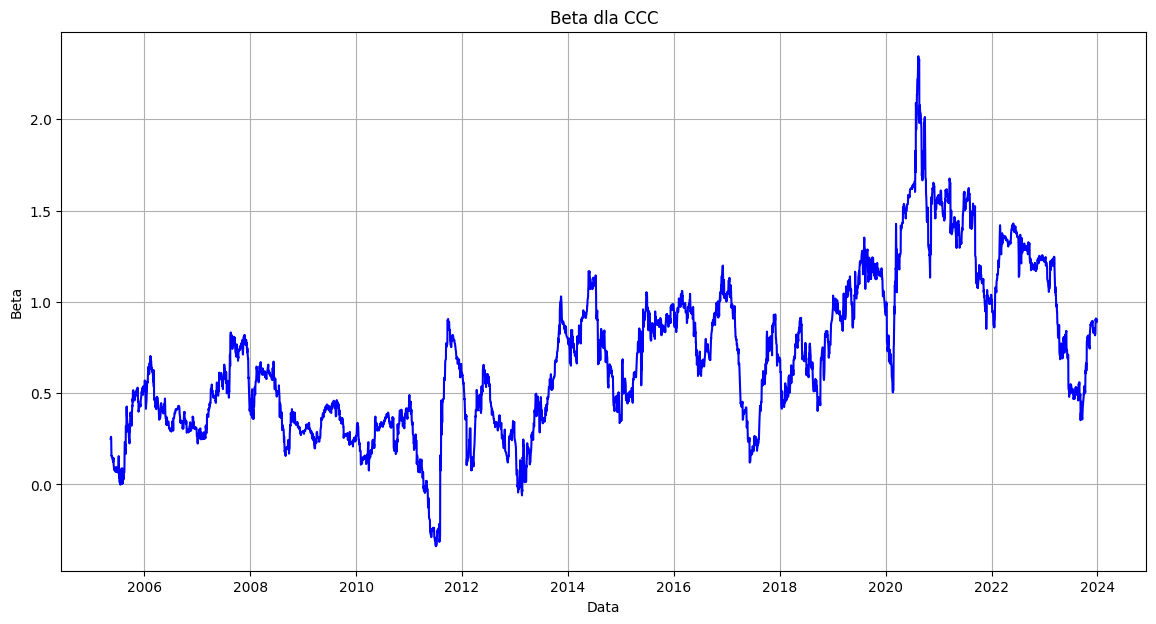

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_ccc.loc[start_date:].index, data_ccc.loc[start_date:]['Beta'], color='blue')
plt.title('Beta dla CCC')
plt.xlabel('Data')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

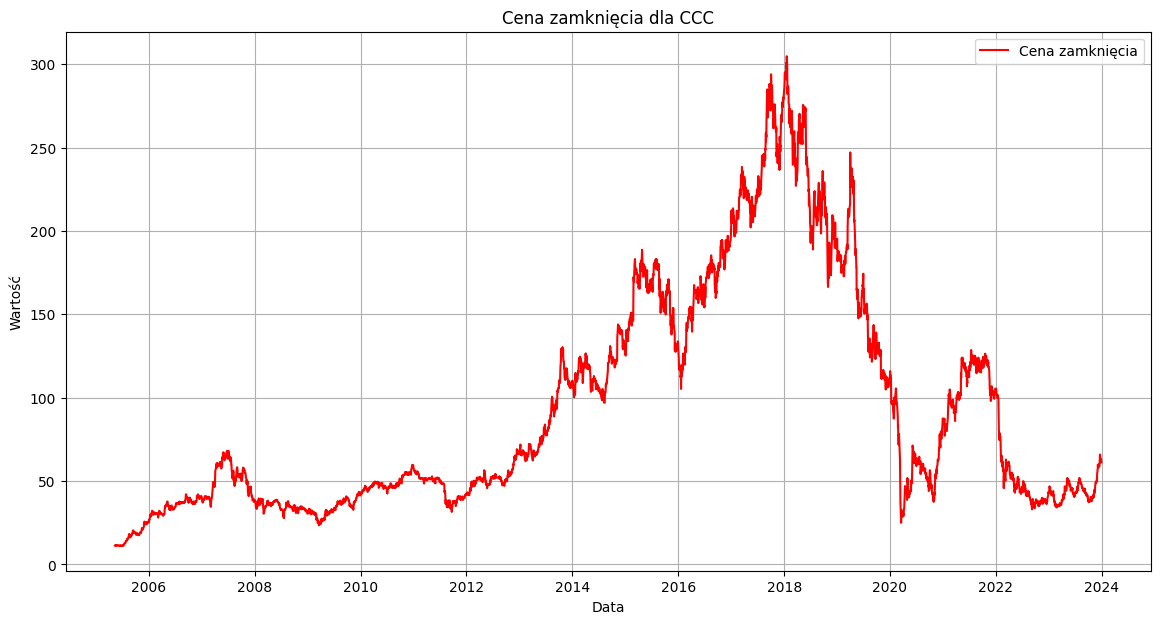

In [15]:
start_date = data_ccc.index[90]

plt.figure(figsize=(14, 7))
plt.plot(data_ccc.loc[start_date:].index, data_ccc.loc[start_date:]['Zamkniecie'], color='red', label='Cena zamknięcia')
plt.title('Cena zamknięcia dla CCC')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.legend()
plt.show()

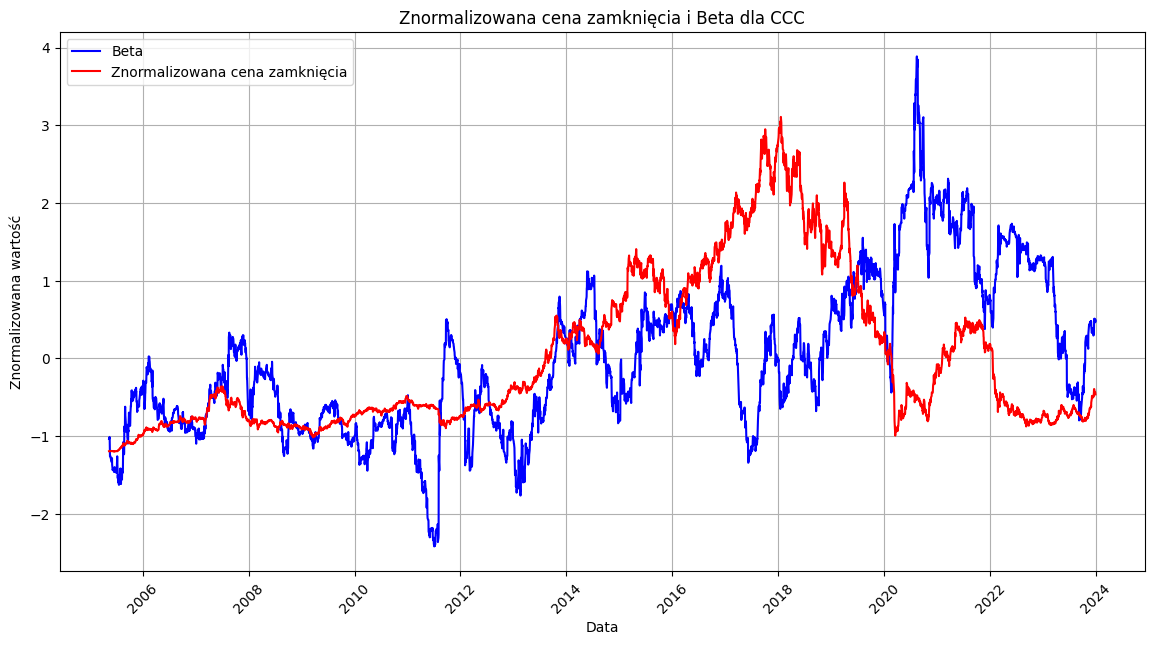

In [16]:
start_date = data_ccc.index[90]

normalized_rolling_beta = (data_ccc.loc[start_date:]['Beta'] - data_ccc.loc[start_date:]['Beta'].mean()) / data_ccc.loc[start_date:]['Beta'].std()
normalized_closing_price = (data_ccc.loc[start_date:]['Zamkniecie'] - data_ccc.loc[start_date:]['Zamkniecie'].mean()) / data_ccc.loc[start_date:]['Zamkniecie'].std()

plt.figure(figsize=(14, 7))
plt.plot(data_ccc.loc[start_date:].index, normalized_rolling_beta, color='blue', label='Beta')
plt.plot(data_ccc.loc[start_date:].index, normalized_closing_price, color='red', label='Znormalizowana cena zamknięcia')
plt.title('Znormalizowana cena zamknięcia i Beta dla CCC')
plt.xlabel('Data')
plt.ylabel('Znormalizowana wartość')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()